## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">


### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

#### Answer Q1:
*From the 4 types, the analytical approach I think that would solve the problem is the Diagnostic approach, the reason being that the Diagnostic approach we analyze the data set to answer questions such as why is it happening, in our question it would be why is the certain wine better than others. Additionally, we also ask what is happening, for the wine example again we ask why certain features are linked to the quality of red wine. With this approach we mine data, discover new relationships and find correlations.*

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

#### Answer Q2:
*The Type of data which we prefer is continuous or categorical(ordinal) values, since these are values where we can perform some sort of mathematical operation or statistical algorithms. Such factors include acidity, pH level, sugar, and other chemical properties.*

### Data Collection

**Q3. From where do we get our data?**


#### Answer Q3:
*We get our data from UCI Machine Learning Repository*

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

#### Answer Q4:
*The red wine samples are obtained from the north of Portugal*

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

#### Answer Q5:
*If we know of each variable effects the redwine quality this would help producers, distributors, and business in the red wine buissness better inderstand how to make more better quality products, distrubtions, and better pricing plan*

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

Shape of data: (1599, 12) 

Datatypes of features:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object 

Heatmap of the dataset:
We are doing to see if any one factor has a greater influence on the quality of the wine
we can see that alcohol is the biggest factor for the quality of the wine, and we should be focus on this more
The most important factors are(in decending order): alcohol, sulphates,and citric acid


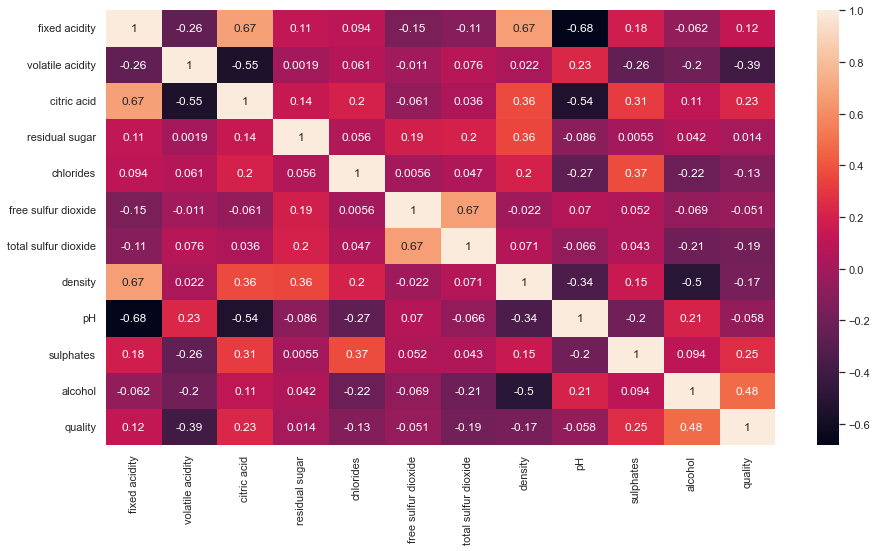

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

wine = pd.read_csv("winequality-red.csv")

#Shape of data
print("Shape of data:",wine.shape,"\n")

#datatypes of features
features = wine.drop("quality",axis =1 , inplace=False)
print("Datatypes of features:")
print(features.dtypes,"\n")

#Correlation of features to labels
print("Heatmap of the dataset:")
print("We are doing to see if any one factor has a greater influence on the quality of the wine")
sb.set(rc = {'figure.figsize':(15,8)})
sb.heatmap(wine.corr(),annot=True)
print("we can see that alcohol is the biggest factor for the quality of the wine, "
      "and we should be focus on this more")
print("The most important factors are(in decending order): alcohol, sulphates,and citric acid");



### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

### Checking for any missing values

In [2]:
#check for any misssing values in the dataset
print("Any missing values:")
print(wine.isnull().sum(),"\nOverall:",wine.isnull().sum().sum(),"\n")
print("No missing values\n")

Any missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64 
Overall: 0 

No missing values



### Checking for outliers and handling them

In [3]:
def detect_outlier(feature):
    outliers = []
    data = wine[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [4]:
#check for outliers
print(wine.describe(),"\n")

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [5]:
# The following features which may have outliers 
features = wine.drop("quality",axis =1 , inplace=False)
for feat in features:
    detect_outlier(feat)


Outlier caps for fixed acidity:
  --95p: 11.8 / 78 values exceed that
  --3sd: 13.5 / 12 values exceed that
  --99p: 13.3 / 14 values exceed that

Outlier caps for volatile acidity:
  --95p: 0.8 / 76 values exceed that
  --3sd: 1.1 / 10 values exceed that
  --99p: 1.0 / 15 values exceed that

Outlier caps for citric acid:
  --95p: 0.6 / 78 values exceed that
  --3sd: 0.9 / 1 values exceed that
  --99p: 0.7 / 16 values exceed that

Outlier caps for residual sugar:
  --95p: 5.1 / 79 values exceed that
  --3sd: 6.8 / 30 values exceed that
  --99p: 8.3 / 16 values exceed that

Outlier caps for chlorides:
  --95p: 0.1 / 80 values exceed that
  --3sd: 0.2 / 31 values exceed that
  --99p: 0.4 / 16 values exceed that

Outlier caps for free sulfur dioxide:
  --95p: 35.0 / 77 values exceed that
  --3sd: 47.2 / 22 values exceed that
  --99p: 50.0 / 16 values exceed that

Outlier caps for total sulfur dioxide:
  --95p: 112.1 / 80 values exceed that
  --3sd: 145.1 / 15 values exceed that
  --99p: 

In [6]:
# we will be using the 99th percentile for the extreme values
# Cap features
feat = [];
for x in features:
    feat.append(x)
for x in feat:
    wine[x] = wine[x].clip(upper=wine[x].quantile(.99))

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.308193,0.526488,0.270365,2.50253,0.086700,15.807580,46.239525,0.996735,3.310165,0.655201,10.418751,5.636023
std,1.701579,0.174212,0.193243,1.17140,0.041083,10.190936,31.818151,0.001852,0.151328,0.153624,1.052287,0.807569
min,4.600000,0.120000,0.000000,0.90000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.90000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.20000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.60000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,13.300000,1.020000,0.700200,8.30600,0.360160,50.020000,145.000000,1.001506,3.700200,1.260400,13.400000,8.000000


### Plotting a Heatmap

Heatmap of the dataset:
we can see that alcohol is the biggest factor for the quality of the wine,
and we should be focus on this more


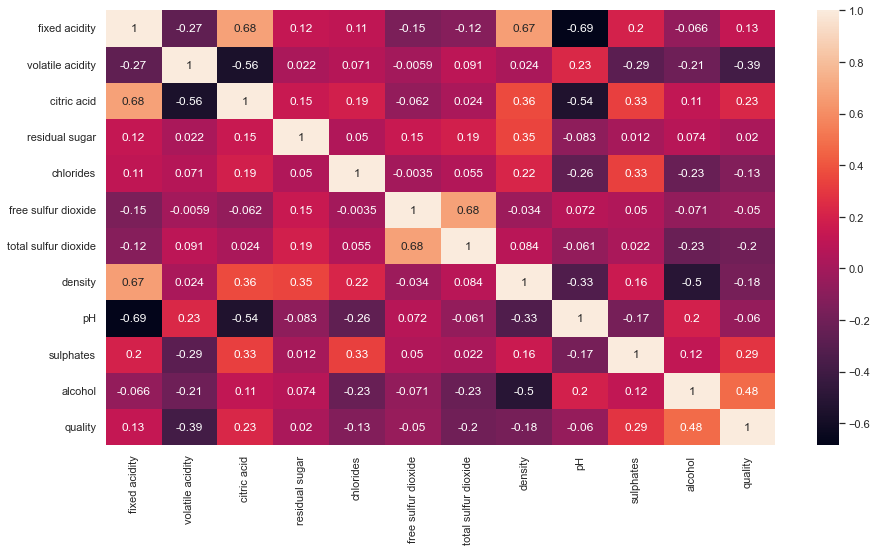

In [8]:
#Correlation of features to labels
print("Heatmap of the dataset:")
sb.set(rc = {'figure.figsize':(15,8)})
sb.heatmap(wine.corr(),annot=True)
print("we can see that alcohol is the biggest factor for the quality of the wine,\n"
      "and we should be focus on this more")

### Check the distribution of data using histograms

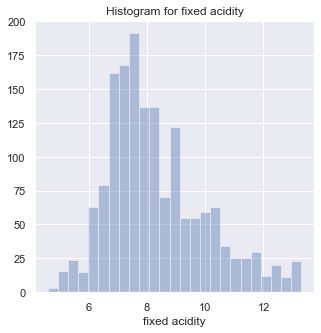

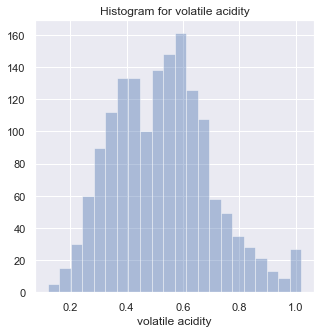

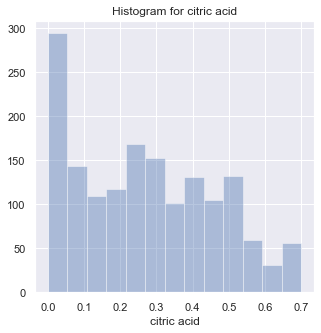

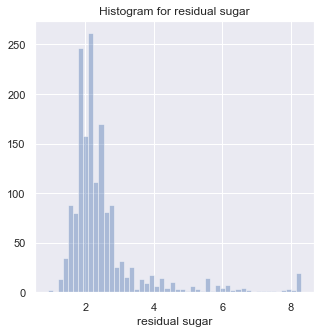

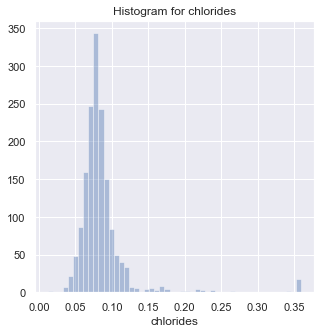

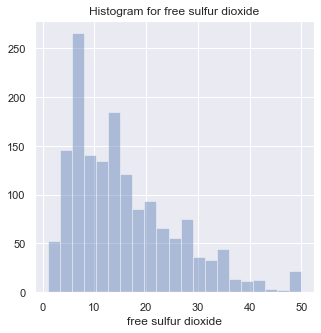

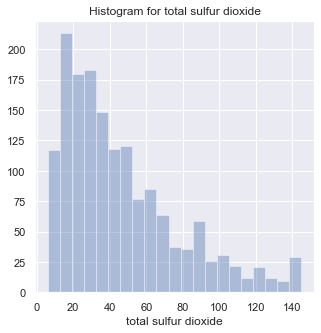

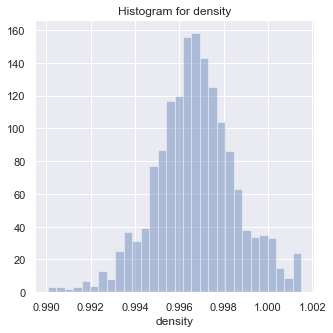

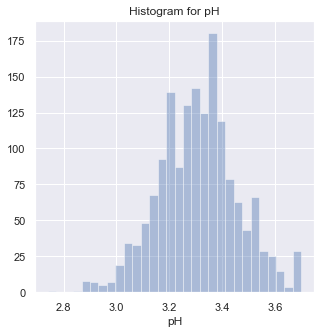

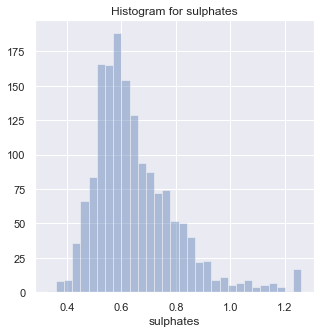

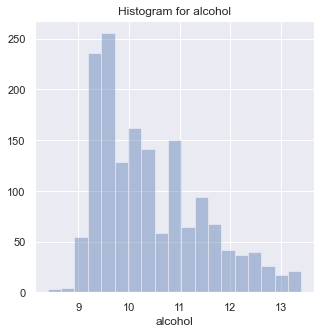

In [9]:
#Histogram distrubition of data
# we need to see if either features are even skewed
for feature in feat:
    plt.figure(figsize=(5,5))
    sb.distplot(wine[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

### Preparing the data for modeling 

In [10]:
#Preparing Features For Modeling: Create Training And Test Sets 
from sklearn.model_selection import train_test_split

features = wine.drop(['quality'], axis=1)
labels = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

#Preparing Features For Modeling: Standardize All Features 
from sklearn.preprocessing import StandardScaler
wine_train = X_train
wine_val = X_val
wine_test = X_test
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(wine_train)

# Scale the training, test, and validation sets
features = wine_train.columns

wine_train[features] = scaler.transform(wine_train[features])
wine_val[features] = scaler.transform(wine_val[features])
wine_test[features] = scaler.transform(wine_test[features])

# Read in all labels
wine_train_labels = y_train
wine_val_labels = y_val
wine_test_labels = y_test



### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

### Multivariable Linear Regression 
#### Ridge Regressor 

In [11]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=10.0);
rd.fit(wine_train,wine_train_labels)

Ridge(alpha=10.0)

In [12]:
# Ridge against validation set  
print("Score against validation set", round(rd.score(wine_val,wine_val_labels),3))

Score against validation set 0.346


In [13]:
# Ridge against test set  
print("Score against test set", round(rd.score(wine_test,wine_test_labels),3))

Score against test set 0.337


#### Linear Regressor 

In [14]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(wine_train,wine_train_labels)

LinearRegression()

In [15]:
# Linear Regressor  against validation set  
print("Score against validation set", round(LinReg.score(wine_val,wine_val_labels),3))

Score against validation set 0.345


In [16]:
# Linear Regressor  against test set  
print("Score against test set", round(LinReg.score(wine_test,wine_test_labels),3))

Score against test set 0.336


### Neural Network using Tensorflow and Keras

In [40]:
!pip install tensorflow

In [41]:
import tensorflow as tf
tf.version.VERSION

'2.9.1'

In [42]:
!pip install torch

In [43]:
# MNIST - Keras

In [44]:
import tensorflow
# from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [45]:
wine_train.shape

(959, 11)

In [46]:
wine_val.shape

(320, 11)

In [21]:
# model.reset_metrics()
# model.reset_states()

In [22]:
n_classes = 9
y_train = to_categorical(wine_train_labels, n_classes)
y_val = to_categorical(wine_val_labels, n_classes)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 9)                 585       
                                                                 
Total params: 9,673
Trainable params: 9,673
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [25]:
model.fit(wine_train, y_train, batch_size=128, epochs=300, verbose = 1,validation_data=(wine_val, y_val))

Epoch 1/300
8/8 [==============================] - 1s 32ms/step - loss: 0.2846 - accuracy: 0.0271 - val_loss: 0.2853 - val_accuracy: 0.0312
Epoch 2/300
8/8 [==============================] - 0s 7ms/step - loss: 0.2825 - accuracy: 0.0313 - val_loss: 0.2831 - val_accuracy: 0.0312
Epoch 3/300
8/8 [==============================] - 0s 6ms/step - loss: 0.2804 - accuracy: 0.0323 - val_loss: 0.2809 - val_accuracy: 0.0312
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 0.2783 - accuracy: 0.0365 - val_loss: 0.2788 - val_accuracy: 0.0312
Epoch 5/300
8/8 [==============================] - 0s 8ms/step - loss: 0.2764 - accuracy: 0.0375 - val_loss: 0.2768 - val_accuracy: 0.0312
Epoch 6/300
8/8 [==============================] - 0s 7ms/step - loss: 0.2744 - accuracy: 0.0438 - val_loss: 0.2748 - val_accuracy: 0.0375
Epoch 7/300
8/8 [==============================] - 0s 6ms/step - loss: 0.2725 - accuracy: 0.0469 - val_loss: 0.2729 - val_accuracy: 0.0375
Epoch 8/300
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 0.1358 - accuracy: 0.4776 - val_loss: 0.1331 - val_accuracy: 0.4313
Epoch 118/300
8/8 [==============================] - 0s 6ms/step - loss: 0.1347 - accuracy: 0.4745 - val_loss: 0.1321 - val_accuracy: 0.4313
Epoch 119/300
8/8 [==============================] - 0s 6ms/step - loss: 0.1337 - accuracy: 0.4755 - val_loss: 0.1311 - val_accuracy: 0.4313
Epoch 120/300
8/8 [==============================] - 0s 6ms/step - loss: 0.1327 - accuracy: 0.4745 - val_loss: 0.1300 - val_accuracy: 0.4313
Epoch 121/300
8/8 [==============================] - 0s 8ms/step - loss: 0.1317 - accuracy: 0.4745 - val_loss: 0.1290 - val_accuracy: 0.4281
Epoch 122/300
8/8 [==============================] - 0s 7ms/step - loss: 0.1307 - accuracy: 0.4734 - val_loss: 0.1280 - val_accuracy: 0.4219
Epoch 123/300
8/8 [==============================] - 0s 6ms/step - loss: 0.1297 - accuracy: 0.4703 - val_loss: 0.1270 - val_accuracy: 0.4250
Epoch 124/300
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.0794 - accuracy: 0.5235 - val_loss: 0.0782 - val_accuracy: 0.4969
Epoch 234/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0793 - accuracy: 0.5235 - val_loss: 0.0781 - val_accuracy: 0.4969
Epoch 235/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0791 - accuracy: 0.5235 - val_loss: 0.0780 - val_accuracy: 0.5000
Epoch 236/300
8/8 [==============================] - 0s 6ms/step - loss: 0.0790 - accuracy: 0.5235 - val_loss: 0.0779 - val_accuracy: 0.4969
Epoch 237/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0789 - accuracy: 0.5255 - val_loss: 0.0777 - val_accuracy: 0.4969
Epoch 238/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0787 - accuracy: 0.5235 - val_loss: 0.0776 - val_accuracy: 0.5000
Epoch 239/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0786 - accuracy: 0.5276 - val_loss: 0.0775 - val_accuracy: 0.5031
Epoch 240/300
8/8 [========

In [26]:
model.evaluate(wine_test, wine_test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 30.9538 - accuracy: 0.0000e+00


[30.95383071899414, 0.0]

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

*TODO*

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

### Regression Models

In [17]:
ridge = rd.predict(wine_test);
linear = LinReg.predict(wine_test)

In [18]:
# R-squared, RMSE, and MAE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#putting squared=False gives us the RMSE
from sklearn.metrics import mean_squared_error

## R-squared
ridge_r2 = r2_score(wine_test_labels, ridge);
linear_r2 = r2_score(wine_test_labels, linear);

## MAE
ridge_mae = mean_absolute_error(wine_test_labels, ridge);
linear_mae = mean_absolute_error(wine_test_labels, linear);

## RMSE
ridge_rmse = mean_squared_error(wine_test_labels, ridge,squared=False);
linear_rmse = mean_squared_error(wine_test_labels, linear,squared=False);


In [19]:
print("Comparing the three metrics to the regressors.\n")


Comparing the three metrics to the regressors.



In [20]:
print("R-squared for both Linear Regressor and Ridge Regressor:\n")
print("Ridge Regressor R-squared:%.3f"%ridge_r2)
print("Linear Regressor R-squared:%.3f"%linear_r2,"\n")

R-squared for both Linear Regressor and Ridge Regressor:

Ridge Regressor R-squared:0.337
Linear Regressor R-squared:0.336 



In [21]:
print("MAE for both Linear Regressor and Ridge Regressor:\n")
print("Ridge Regressor MAE:%.3f"%ridge_mae)
print("Linear Regressor MAE:%.3f"%linear_mae,"\n")

MAE for both Linear Regressor and Ridge Regressor:

Ridge Regressor MAE:0.544
Linear Regressor MAE:0.544 



In [22]:
print("RMSE for both Linear Regressor and Ridge Regressor:\n")
print("*NOTE when we make the squared=False gives us the RMSE from the mean_squared_error function*\n")
print("Ridge Regressor RMSE:%.3f"%ridge_rmse)
print("Linear Regressor RMSE:%.3f"%linear_rmse,"\n")

RMSE for both Linear Regressor and Ridge Regressor:

*NOTE when we make the squared=False gives us the RMSE from the mean_squared_error function*

Ridge Regressor RMSE:0.685
Linear Regressor RMSE:0.685 



In [23]:
print("In the R-squared performance the Ridge Regressor was a bit better then linear regressor,\n"
      "Additionally both the ridge and linear regressors have the same poor perfromance\n"
      "with both the absolute and squared error.\n"
      "Thus we can conclude that overall they are equal in performance.")

In the R-squared performance the Ridge Regressor was a bit better then linear regressor,
Additionally both the ridge and linear regressors have the same poor perfromance
with both the absolute and squared error.
Thus we can conclude that overall they are equal in performance.


#### Calculating the feature importance scores

In [25]:
features = wine.drop(['quality'], axis=1)
labels = wine['quality']

##### Ridge Regressor

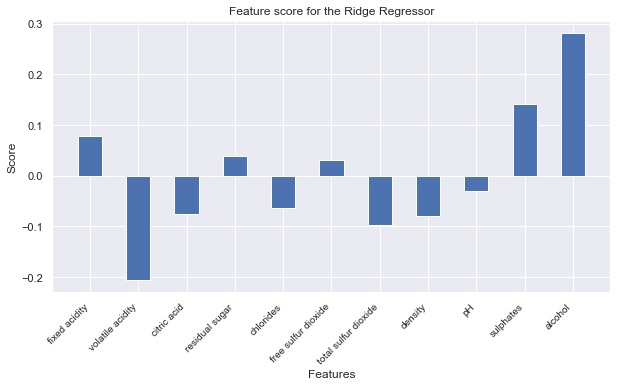

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
feat_name = features.columns
importance = rd.coef_
plt.bar(feat_name, importance,width = 0.5)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.xlabel("Features")
plt.ylabel("Score")
plt.title("Feature score for the Ridge Regressor")
plt.show()

##### LinearRegressor

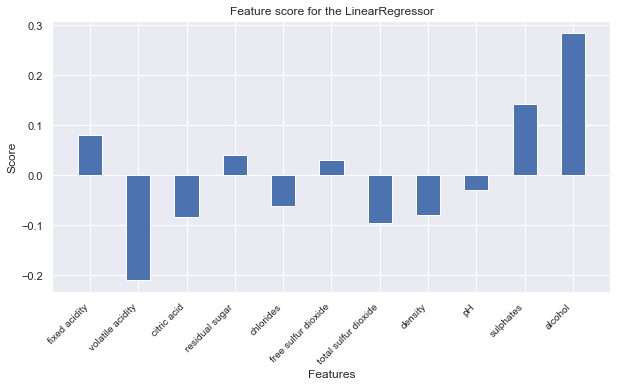

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
feat_name = features.columns
importance = LinReg.coef_
plt.bar(feat_name, importance,width = 0.5)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.xlabel("Features")
plt.ylabel("Score")
plt.title("Feature score for the LinearRegressor")
plt.show()

In [45]:
print("So from both of the bar graph we can see that alcohol is the most important factor in predicting wine quality,\n "
      "and volatile acidity has an opposite relationship meaning higher volatile acidity then worse quality on average")

So from both of the bar graph we can see that alcohol is the most important factor in predicting wine quality,
 and volatile acidity has an opposite relationship meaning higher volatile acidity then worse quality on average


### Classification model

In [61]:
n_classes = 9
y_train = to_categorical(wine_train_labels, n_classes)
y_val = to_categorical(wine_val_labels, n_classes)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])
history = model.fit(wine_train, y_train, batch_size=128, epochs=500, verbose = 1,validation_data=(wine_val, y_val))

Epoch 1/500
8/8 [==============================] - 1s 29ms/step - loss: 0.2444 - accuracy: 0.0334 - val_loss: 0.2441 - val_accuracy: 0.0437
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 0.2430 - accuracy: 0.0375 - val_loss: 0.2426 - val_accuracy: 0.0469
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 0.2416 - accuracy: 0.0375 - val_loss: 0.2412 - val_accuracy: 0.0469
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 0.2402 - accuracy: 0.0396 - val_loss: 0.2398 - val_accuracy: 0.0469
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 0.2388 - accuracy: 0.0407 - val_loss: 0.2384 - val_accuracy: 0.0500
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 0.2374 - accuracy: 0.0407 - val_loss: 0.2370 - val_accuracy: 0.0500
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 0.2361 - accuracy: 0.0417 - val_loss: 0.2356 - val_accuracy: 0.0531
Epoch 8/500
8/8 [=========

8/8 [==============================] - 0s 8ms/step - loss: 0.1052 - accuracy: 0.4432 - val_loss: 0.1041 - val_accuracy: 0.4000
Epoch 118/500
8/8 [==============================] - 0s 7ms/step - loss: 0.1045 - accuracy: 0.4463 - val_loss: 0.1035 - val_accuracy: 0.4031
Epoch 119/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1039 - accuracy: 0.4473 - val_loss: 0.1028 - val_accuracy: 0.4062
Epoch 120/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1033 - accuracy: 0.4484 - val_loss: 0.1022 - val_accuracy: 0.4031
Epoch 121/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1026 - accuracy: 0.4484 - val_loss: 0.1016 - val_accuracy: 0.4031
Epoch 122/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1020 - accuracy: 0.4473 - val_loss: 0.1010 - val_accuracy: 0.4062
Epoch 123/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1014 - accuracy: 0.4432 - val_loss: 0.1004 - val_accuracy: 0.4062
Epoch 124/500
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.0755 - accuracy: 0.5318 - val_loss: 0.0761 - val_accuracy: 0.4719
Epoch 234/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0754 - accuracy: 0.5308 - val_loss: 0.0760 - val_accuracy: 0.4719
Epoch 235/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0753 - accuracy: 0.5328 - val_loss: 0.0759 - val_accuracy: 0.4688
Epoch 236/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0752 - accuracy: 0.5308 - val_loss: 0.0759 - val_accuracy: 0.4688
Epoch 237/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0752 - accuracy: 0.5318 - val_loss: 0.0758 - val_accuracy: 0.4688
Epoch 238/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0751 - accuracy: 0.5318 - val_loss: 0.0757 - val_accuracy: 0.4719
Epoch 239/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0750 - accuracy: 0.5297 - val_loss: 0.0757 - val_accuracy: 0.4719
Epoch 240/500
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.0699 - accuracy: 0.5641 - val_loss: 0.0711 - val_accuracy: 0.5094
Epoch 350/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0699 - accuracy: 0.5662 - val_loss: 0.0711 - val_accuracy: 0.5094
Epoch 351/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0698 - accuracy: 0.5641 - val_loss: 0.0711 - val_accuracy: 0.5094
Epoch 352/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0698 - accuracy: 0.5652 - val_loss: 0.0710 - val_accuracy: 0.5094
Epoch 353/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0698 - accuracy: 0.5662 - val_loss: 0.0710 - val_accuracy: 0.5094
Epoch 354/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0697 - accuracy: 0.5662 - val_loss: 0.0710 - val_accuracy: 0.5094
Epoch 355/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0697 - accuracy: 0.5662 - val_loss: 0.0710 - val_accuracy: 0.5094
Epoch 356/500
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.0669 - accuracy: 0.5798 - val_loss: 0.0686 - val_accuracy: 0.5312
Epoch 466/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0669 - accuracy: 0.5798 - val_loss: 0.0686 - val_accuracy: 0.5312
Epoch 467/500
8/8 [==============================] - 0s 9ms/step - loss: 0.0669 - accuracy: 0.5798 - val_loss: 0.0686 - val_accuracy: 0.5312
Epoch 468/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0669 - accuracy: 0.5798 - val_loss: 0.0685 - val_accuracy: 0.5312
Epoch 469/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0669 - accuracy: 0.5798 - val_loss: 0.0685 - val_accuracy: 0.5312
Epoch 470/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0668 - accuracy: 0.5808 - val_loss: 0.0685 - val_accuracy: 0.5312
Epoch 471/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0668 - accuracy: 0.5819 - val_loss: 0.0685 - val_accuracy: 0.5344
Epoch 472/500
8/8 [========

In [62]:
### training loss and validation loss

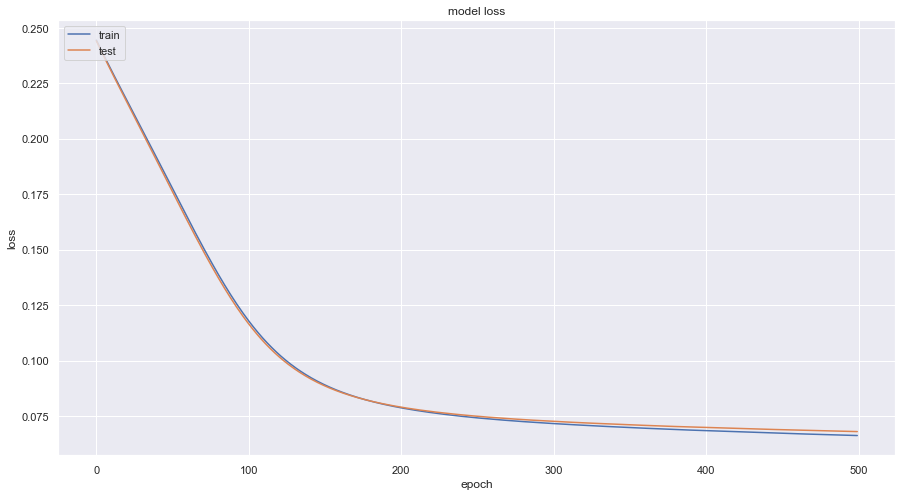

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
##Plot training accuracy and validation accuracy

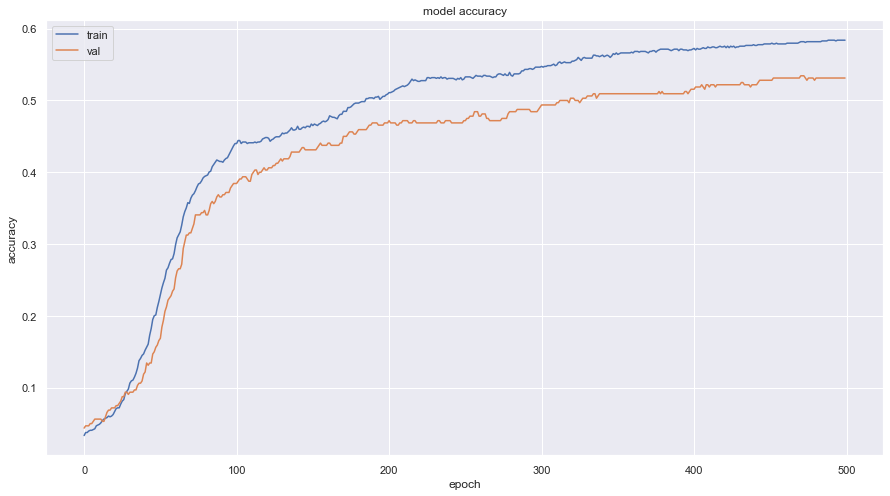

In [65]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##### Evaluate the classsification model using Precision, Recall and Accuracy metrics

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculating accuracy, precision, and recall
model_predict = np.argmax(model.predict(wine_test),axis =1)
accuracy = round(accuracy_score(wine_test_labels, model_predict), 3);
precision = round(precision_score(wine_test_labels, model_predict, average='micro'), 3);
recall = round(recall_score(wine_test_labels, model_predict, average='micro'), 3);

print("Precision, Recall and Accuracy metrics for classification model.")
print('Accuracy: {} % / Precision: {} %/ Recall: {} %'.format(round(accuracy*100,3),round(precision*100,3),round(recall*100,3))) 

10/10 [==============================] - 0s 2ms/step
Precision, Recall and Accuracy metrics for classification model.
Accuracy: 54.1 % / Precision: 54.1 %/ Recall: 54.1 %


### Conclusion

*From this lab the main ideal was to find out features that could effect the quality of the wine, throught this lab we have figured out that alcohol is the most important factor,followed by sulphates when determining the quality of wine. Additionally, there is an inverse between the volatile acidity and quality of wine. These three have been the most contrubuting factor when determing the quality of wine. Lastly, comparing both neural network and the regressors in perfromance, the regressors overall did worse then the neural network. We can see that the neural network is overall better in all components*